In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
import seaborn

In [11]:
df_review = pd.read_csv("review.csv")

In [12]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5261669 entries, 0 to 5261668
Data columns (total 4 columns):
business_id    object
user_id        object
stars          int64
date           object
dtypes: int64(1), object(3)
memory usage: 160.6+ MB


In [13]:
df_review.columns

Index(['business_id', 'user_id', 'stars', 'date'], dtype='object')

In [14]:
df_review.columns = ['business_id', 'user_id', 'stars', 'date']

In [15]:
df_review.describe(include="all").T

count   unique                     top  freq     mean  \
business_id      5261669   174567  4JNXUYY8wbaaDmk3BPzlWw  7362      NaN   
user_id          5261669  1326101  CxDOIDnH8gp9KXzpBHJYXw  3569      NaN   
stars        5.26167e+06      NaN                     NaN   NaN  3.72774   
date             5261669     4547     2017-08-12 00:00:00  4614      NaN   

                 std  min  25%  50%  75%  max  
business_id      NaN  NaN  NaN  NaN  NaN  NaN  
user_id          NaN  NaN  NaN  NaN  NaN  NaN  
stars        1.43359    1    3    4    5    5  
date             NaN  NaN  NaN  NaN  NaN  NaN

In [16]:
df_review.head(5)

business_id                 user_id  stars                 date
0  Ue6-WhXvI-_1xUIuapl0zQ  gVmUR8rqUFdbSeZbsg6z_w      4  2014-02-17 00:00:00
1  Ae4ABFarGMaI5lk1i98A0w  Y6qylbHq8QJmaCRSlKdIog      4  2016-07-24 00:00:00
2  lKq4Qsz13FDcAVgp49uukQ  SnXZkRN9Yf060pNTk1HMDg      5  2012-04-07 00:00:00
3  6nKR80xEGHYf2UxAe_Cu_g  VcmSgvslHAhqWoEn16wjjw      5  2015-09-11 00:00:00
4  Z_mJYg3vi8cPZHa1J4BALw  NKF9v-r0jd1p0JVi9h2T1w      5  2016-01-22 00:00:00

In [17]:
df_business = pd.read_csv("business_attribute.txt", sep='\t')
df_business.head(5)

business_id  AcceptsInsurance  ByAppointmentOnly  \
0  --6MefnULPED_I942VcFNA               NaN                NaN   
1  --7zmmkVg-IMGaXbuVd0SQ               NaN                NaN   
2  --8LPVSo5i0Oo61X01sV9A               1.0                1.0   
3  --9e1ONYQuAa-CB_Rrw7Tw               NaN                NaN   
4  --9QQLMTbFzLJ_oT-ON3Xw               NaN                0.0   

   BusinessAcceptsCreditCards  \
0                         1.0   
1                         1.0   
2                         1.0   
3                         1.0   
4                         1.0   

                                     BusinessParking HairSpecializesIn  \
0  {"garage": false, "street": false, "validated"...               NaN   
1  {"garage": false, "street": false, "validated"...               NaN   
2                                                NaN               NaN   
3  {"garage": true, "street": false, "validated":...               NaN   
4  {"garage": false, "street": false, "validated"...               NaN   

   RestaurantsPriceRange2  GoodForKids  WheelchairAccessible  BikeParking  \
0                     2.0          1.0                   1.0          0.0   
1                     1.0          NaN                   NaN          1.0   
2                     NaN          NaN                   NaN          NaN   
3                     4.0          0.0                   1.0          0.0   
4                     1.0          1.0                   NaN          NaN   

             ...             DriveThru  DogsAllowed BusinessAcceptsBitcoin  \
0            ...                   NaN          NaN                    NaN   
1            ...                   NaN          NaN                    NaN   
2            ...                   NaN          NaN                    NaN   
3            ...                   NaN          NaN                    NaN   
4            ...                   NaN          NaN                    NaN   

  Open24Hours  BYOBCorkage BYOB  Corkage  DietaryRestrictions AgesAllowed  \
0         NaN          NaN  NaN      NaN                  NaN         NaN   
1         NaN          NaN  NaN      NaN                  NaN         NaN   
2         NaN          NaN  NaN      NaN                  NaN         NaN   
3         0.0  yes_corkage  0.0      1.0                  NaN         NaN   
4         NaN          NaN  NaN      NaN                  NaN         NaN   

   RestaurantsCounterService  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 40 columns]

In [18]:
df_category = pd.read_csv("category.csv", sep=',', quoting=1, quotechar='"', low_memory=False)

In [19]:
df_category.columns

Index(['business_id', ' category', ' id', ' name', ' neighborhood', ' address',
       ' city', ' state', ' postal_code', ' latitude', ' longitude', ' stars',
       ' review_count', ' is_open'],
      dtype='object')

In [20]:
df_category.columns = ['business_id', 'category', 'id', 'name', 'neighborhood', 'address',
       'city', 'state', 'postal_code', 'latitude', 'longitude', 'stars',
       'review_count', 'is_open']

In [21]:
df_category.head()

business_id                                           category  \
0  --6MefnULPED_I942VcFNA                               Chinese, Restaurants   
1  --7zmmkVg-IMGaXbuVd0SQ                                    Food, Breweries   
2  --8LPVSo5i0Oo61X01sV9A  Orthopedists, Weight Loss Centers, Sports Medi...   
3  --9e1ONYQuAa-CB_Rrw7Tw             Cajun/Creole, Steakhouses, Restaurants   
4  --9QQLMTbFzLJ_oT-ON3Xw                         Hair Salons, Beauty & Spas   

                       id                               name neighborhood  \
0  --6MefnULPED_I942VcFNA      John's Chinese BBQ Restaurant          NaN   
1  --7zmmkVg-IMGaXbuVd0SQ                     Primal Brewery          NaN   
2  --8LPVSo5i0Oo61X01sV9A  Valley Bone and Joint Specialists          NaN   
3  --9e1ONYQuAa-CB_Rrw7Tw               Delmonico Steakhouse    The Strip   
4  --9QQLMTbFzLJ_oT-ON3Xw                        Great Clips          NaN   

                                      address           city state  \
0  328 Highway 7 E, Chalmers Gate 11, Unit 10  Richmond Hill    ON   
1                    16432 Old Statesville Rd   Huntersville    NC   
2                 3941 E Baseline Rd, Ste 102        Gilbert    AZ   
3                       3355 Las Vegas Blvd S      Las Vegas    NV   
4                1835 E Guadalupe Rd, Ste 106          Tempe    AZ   

  postal_code latitude longitude  stars  review_count  is_open  
0     L4B 3P7  43.8409  -79.3996    3.0            37        1  
1       28078  35.4371  -80.8437    4.0            47        1  
2       85234  33.3795  -111.728    4.5             3        1  
3       89109  36.1232  -115.169    4.0          1451        1  
4       85283  33.3617   -111.91    3.5            11        1

In [22]:
df_category[df_category.business_id != df_category.id]

Empty DataFrame
Columns: [business_id, category, id, name, neighborhood, address, city, state, postal_code, latitude, longitude, stars, review_count, is_open]
Index: []

Above output shows that the business_id and id field in the category dataset is the same. So dropped the id field

In [23]:
df_category.drop("id", inplace=True, axis=1)

In [24]:
df_business = df_business.merge(df_category, how='outer', on='business_id')

In [25]:
df_business.describe(include='all').T

count  unique  \
business_id                 174120  174120   
AcceptsInsurance             10133     NaN   
ByAppointmentOnly            40129     NaN   
BusinessAcceptsCreditCards  131714     NaN   
BusinessParking              96421      38   
HairSpecializesIn             1605     145   
RestaurantsPriceRange2      102754     NaN   
GoodForKids                  61625     NaN   
WheelchairAccessible         47910     NaN   
BikeParking                  79014     NaN   
Alcohol                      46167       3   
HasTV                        45523     NaN   
NoiseLevel                   42325       4   
RestaurantsAttire            46707       3   
Music                         8507      55   
Ambience                     44966     159   
RestaurantsGoodForGroups     51888     NaN   
Caters                       37076     NaN   
WiFi                         46210       3   
RestaurantsReservations      48774     NaN   
RestaurantsTakeOut           57786     NaN   
HappyHour                     8889     NaN   
GoodForDancing                8949     NaN   
RestaurantsTableService      41632     NaN   
OutdoorSeating               52468     NaN   
RestaurantsDelivery          49168     NaN   
BestNights                    6719      64   
GoodForMeal                  45044      63   
CoatCheck                     8392     NaN   
Smoking                       8078       3   
DriveThru                     6364     NaN   
DogsAllowed                  12614     NaN   
BusinessAcceptsBitcoin       10619     NaN   
Open24Hours                    351     NaN   
BYOBCorkage                   1406       3   
BYOB                           909     NaN   
Corkage                        655     NaN   
DietaryRestrictions            280      20   
AgesAllowed                    407       4   
RestaurantsCounterService      397     NaN   
category                    174067   76421   
name                        174067  132237   
neighborhood                 67855     408   
address                     167653  138215   
city                        174066    1092   
state                       174066      66   
postal_code                 173446   15979   
latitude                    174067   29983   
longitude                   174067   30931   
stars                       174067     NaN   
review_count                174067     NaN   
is_open                     174067     NaN   

                                                                          top  \
business_id                                            82owX12OYegVtX7gjQC5bw   
AcceptsInsurance                                                          NaN   
ByAppointmentOnly                                                         NaN   
BusinessAcceptsCreditCards                                                NaN   
BusinessParking             {"garage": false, "street": false, "validated"...   
HairSpecializesIn           {"coloring": true, "africanamerican": true, "c...   
RestaurantsPriceRange2                                                    NaN   
GoodForKids                                                               NaN   
WheelchairAccessible                                                      NaN   
BikeParking                                                               NaN   
Alcohol                                                                  none   
HasTV                                                                     NaN   
NoiseLevel                                                            average   
RestaurantsAttire                                                      casual   
Music                       {"dj": false, "background_music": false, "no_m...   
Ambience                    {"romantic": false, "intimate": false, "classy...   
RestaurantsGoodForGroups                                                  NaN   
Caters                                                                    NaN   
WiFi                                               

In [26]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174120 entries, 0 to 174119
Data columns (total 52 columns):
business_id                   174120 non-null object
AcceptsInsurance              10133 non-null float64
ByAppointmentOnly             40129 non-null float64
BusinessAcceptsCreditCards    131714 non-null float64
BusinessParking               96421 non-null object
HairSpecializesIn             1605 non-null object
RestaurantsPriceRange2        102754 non-null float64
GoodForKids                   61625 non-null float64
WheelchairAccessible          47910 non-null float64
BikeParking                   79014 non-null float64
Alcohol                       46167 non-null object
HasTV                         45523 non-null float64
NoiseLevel                    42325 non-null object
RestaurantsAttire             46707 non-null object
Music                         8507 non-null object
Ambience                      44966 non-null object
RestaurantsGoodForGroups      51888 non-null flo

In [27]:
df_business = df_business.infer_objects()
df_business.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174120 entries, 0 to 174119
Data columns (total 52 columns):
business_id                   174120 non-null object
AcceptsInsurance              10133 non-null float64
ByAppointmentOnly             40129 non-null float64
BusinessAcceptsCreditCards    131714 non-null float64
BusinessParking               96421 non-null object
HairSpecializesIn             1605 non-null object
RestaurantsPriceRange2        102754 non-null float64
GoodForKids                   61625 non-null float64
WheelchairAccessible          47910 non-null float64
BikeParking                   79014 non-null float64
Alcohol                       46167 non-null object
HasTV                         45523 non-null float64
NoiseLevel                    42325 non-null object
RestaurantsAttire             46707 non-null object
Music                         8507 non-null object
Ambience                      44966 non-null object
RestaurantsGoodForGroups      51888 non-null flo

Below code is to convert all field values \N to NaN's. \N is generated by mysql while data is exported and all the null values are converted to \N

Convert latitude and longitude into numeric

In [28]:
df_business = df_business.apply(lambda x: np.where(x=="\\N", np.NaN, x), axis=1)
df_business.latitude = pd.to_numeric(df_business.latitude)
df_business.longitude = pd.to_numeric(df_business.longitude)
df_business = df_business.infer_objects()
df_business.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174120 entries, 0 to 174119
Data columns (total 52 columns):
business_id                   174120 non-null object
AcceptsInsurance              10133 non-null float64
ByAppointmentOnly             40129 non-null float64
BusinessAcceptsCreditCards    131714 non-null float64
BusinessParking               96421 non-null object
HairSpecializesIn             1605 non-null object
RestaurantsPriceRange2        102754 non-null float64
GoodForKids                   61625 non-null float64
WheelchairAccessible          47910 non-null float64
BikeParking                   79014 non-null float64
Alcohol                       46167 non-null object
HasTV                         45523 non-null float64
NoiseLevel                    42325 non-null object
RestaurantsAttire             46707 non-null object
Music                         8507 non-null object
Ambience                      44966 non-null object
RestaurantsGoodForGroups      51888 non-null flo

In [29]:
# Drop business with categories not defined
df_business = df_business[~df_business.category.isna()]

In [30]:
# Just keep resturant business (includes restaurants|breweries|bars|bagels|donuts|pizza)
df_business = df_business[df_business.category.str.contains("restaurants|breweries|bars|bagels|donuts|pizza", case=False)].reset_index(drop=True)

In [31]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59437 entries, 0 to 59436
Data columns (total 52 columns):
business_id                   59437 non-null object
AcceptsInsurance              42 non-null float64
ByAppointmentOnly             653 non-null float64
BusinessAcceptsCreditCards    51420 non-null float64
BusinessParking               47976 non-null object
HairSpecializesIn             7 non-null object
RestaurantsPriceRange2        53876 non-null float64
GoodForKids                   47861 non-null float64
WheelchairAccessible          24484 non-null float64
BikeParking                   39624 non-null float64
Alcohol                       44773 non-null object
HasTV                         44795 non-null float64
NoiseLevel                    41662 non-null object
RestaurantsAttire             46692 non-null object
Music                         7783 non-null object
Ambience                      44255 non-null object
RestaurantsGoodForGroups      51014 non-null float64
Caters  

In [32]:
df_business.category.head()

0                                 Chinese, Restaurants
1                                      Food, Breweries
2               Cajun/Creole, Steakhouses, Restaurants
3    Music Venues, Piano Bars, Arts & Entertainment...
4       Spanish, Peruvian, Restaurants, Latin American
Name: category, dtype: object

In [33]:
# Just keep the resturant reviews
df_review = df_review[df_review.business_id.isin(df_business.business_id)].reset_index(drop=True)

In [34]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3377606 entries, 0 to 3377605
Data columns (total 4 columns):
business_id    object
user_id        object
stars          int64
date           object
dtypes: int64(1), object(3)
memory usage: 103.1+ MB


In [35]:
df_user = pd.read_csv("user_details.csv", sep = '\t')
df_user_elite = pd.read_csv("user_elite_yr.csv")
df_user.head()

id    name  review_count        yelping_since  useful  \
0  ---1lKK3aKOuomHnwAkAow  Monera           246  2007-06-04 00:00:00      67   
1  ---94vtJ_5o_nikEs6hUjg     Joe             2  2016-05-27 00:00:00       0   
2  ---cu1hq55BP9DWVXXKHZg     Jeb            57  2009-04-18 00:00:00      34   
3  ---fhiwiwBYrvqhpXgcWDQ     Jed             8  2011-04-20 00:00:00       2   
4  ---PLwSf5gKdIoVnyRHgBA     Rae             2  2015-07-31 00:00:00       1   

   funny  cool  fans  average_stars  compliment_hot  compliment_more  \
0     22     9    15           3.96               2                3   
1      0     0     0           5.00               0                0   
2     14     0     0           3.79               0                0   
3      3     1     0           2.78               0                0   
4      0     0     0           4.00               0                0   

   compliment_profile  compliment_cute  compliment_list  compliment_note  \
0                   2                1                0                5   
1                   0                0                0                0   
2                   0                0                0                3   
3                   0                0                0                0   
4                   0                0                0                0   

   compliment_plain  compliment_cool  compliment_funny  compliment_writer  \
0                 9                9                 9                  9   
1                 0                0                 0                  0   
2                 2                0                 0                  0   
3                 0                0                 0                  0   
4                 0                0                 0                  0   

   compliment_photos  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0

In [36]:
df_user_elite.head()

user_id  yr_2005  yr_2006  yr_2007  yr_2008  yr_2009  \
0  ---1lKK3aKOuomHnwAkAow      NaN      NaN      NaN      NaN      NaN   
1  --2vR0DIsmQ6WfcSzKWigw      NaN      NaN      NaN      NaN      NaN   
2  --3l8wysfp49Z2TLnyT0vg      NaN      NaN      NaN      NaN      NaN   
3  --3WaS23LcIXtxyFULJHTA      NaN      NaN      NaN      NaN      NaN   
4  --41c9Tl0C9OGewIR7Qyzg      NaN      NaN      NaN      NaN      NaN   

   yr_2010  yr_2011  yr_2012  yr_2013  yr_2014  yr_2015  yr_2016  yr_2017  
0      1.0      1.0      1.0      1.0      NaN      NaN      NaN      NaN  
1      NaN      NaN      NaN      1.0      1.0      1.0      1.0      1.0  
2      NaN      NaN      NaN      NaN      NaN      NaN      1.0      NaN  
3      NaN      NaN      1.0      1.0      1.0      1.0      1.0      1.0  
4      NaN      NaN      1.0      1.0      1.0      1.0      1.0      NaN

In [37]:
df_user.info()
df_user_elite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1326101 entries, 0 to 1326100
Data columns (total 20 columns):
id                    1326101 non-null object
name                  1325604 non-null object
review_count          1326101 non-null int64
yelping_since         1326101 non-null object
useful                1326101 non-null int64
funny                 1326101 non-null int64
cool                  1326101 non-null int64
fans                  1326101 non-null int64
average_stars         1326101 non-null float64
compliment_hot        1326101 non-null int64
compliment_more       1326101 non-null int64
compliment_profile    1326101 non-null int64
compliment_cute       1326101 non-null int64
compliment_list       1326101 non-null int64
compliment_note       1326101 non-null int64
compliment_plain      1326101 non-null int64
compliment_cool       1326101 non-null int64
compliment_funny      1326101 non-null int64
compliment_writer     1326101 non-null int64
compliment_photos     13261

In [38]:
df_user = df_user.merge(df_user_elite, how='left', left_on = 'id', right_on = 'user_id')

In [39]:
df_user['year_yelping_since'] = [i[:4] for i in df_user.yelping_since]
df_user.infer_objects()
df_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1326101 entries, 0 to 1326100
Data columns (total 35 columns):
id                    1326101 non-null object
name                  1325604 non-null object
review_count          1326101 non-null int64
yelping_since         1326101 non-null object
useful                1326101 non-null int64
funny                 1326101 non-null int64
cool                  1326101 non-null int64
fans                  1326101 non-null int64
average_stars         1326101 non-null float64
compliment_hot        1326101 non-null int64
compliment_more       1326101 non-null int64
compliment_profile    1326101 non-null int64
compliment_cute       1326101 non-null int64
compliment_list       1326101 non-null int64
compliment_note       1326101 non-null int64
compliment_plain      1326101 non-null int64
compliment_cool       1326101 non-null int64
compliment_funny      1326101 non-null int64
compliment_writer     1326101 non-null int64
compliment_photos     13261

In [40]:
df_user.yelping_since = pd.to_datetime(df_user.yelping_since)
df_user.head()

id    name  review_count yelping_since  useful  funny  \
0  ---1lKK3aKOuomHnwAkAow  Monera           246    2007-06-04      67     22   
1  ---94vtJ_5o_nikEs6hUjg     Joe             2    2016-05-27       0      0   
2  ---cu1hq55BP9DWVXXKHZg     Jeb            57    2009-04-18      34     14   
3  ---fhiwiwBYrvqhpXgcWDQ     Jed             8    2011-04-20       2      3   
4  ---PLwSf5gKdIoVnyRHgBA     Rae             2    2015-07-31       1      0   

   cool  fans  average_stars  compliment_hot         ...          yr_2009  \
0     9    15           3.96               2         ...              NaN   
1     0     0           5.00               0         ...              NaN   
2     0     0           3.79               0         ...              NaN   
3     1     0           2.78               0         ...              NaN   
4     0     0           4.00               0         ...              NaN   

   yr_2010  yr_2011  yr_2012  yr_2013  yr_2014  yr_2015  yr_2016  yr_2017  \
0      1.0      1.0      1.0      1.0      NaN      NaN      NaN      NaN   
1      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
4      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

   year_yelping_since  
0                2007  
1                2016  
2                2009  
3                2011  
4                2015  

[5 rows x 35 columns]

In [41]:
df_user.columns

Index(['id', 'name', 'review_count', 'yelping_since', 'useful', 'funny',
       'cool', 'fans', 'average_stars', 'compliment_hot', 'compliment_more',
       'compliment_profile', 'compliment_cute', 'compliment_list',
       'compliment_note', 'compliment_plain', 'compliment_cool',
       'compliment_funny', 'compliment_writer', 'compliment_photos', 'user_id',
       'yr_2005', 'yr_2006', 'yr_2007', 'yr_2008', 'yr_2009', 'yr_2010',
       'yr_2011', 'yr_2012', 'yr_2013', 'yr_2014', 'yr_2015', 'yr_2016',
       'yr_2017', 'year_yelping_since'],
      dtype='object')

In [42]:
# x is an array where index of 
# 'year_yelping_since' = 34
# 'yr_2005' = 21
# 'yr_2006' = 22
# 'yr_2007' = 23
# 'yr_2008' = 24
# 'yr_2009' = 25
# 'yr_2010' = 26
# 'yr_2011' = 27
# 'yr_2012' = 28
# 'yr_2013' = 29
# 'yr_2014' = 30
# 'yr_2015' = 31
# 'yr_2016' = 32
# 'yr_2017' = 33
def eliteYearBasedOnProfileCreationYear(x):
    if(not pd.isnull(x[34])):
        if(int(x[34]) <= 2005):
            if pd.isnull(x[21]):
                x[21] = 0
        if(int(x[34]) <= 2006):
            if pd.isnull(x[22]):
                x[22] = 0
        if(int(x[34]) <= 2007):
            if pd.isnull(x[23]):
                x[23] = 0
        if(int(x[34])<= 2008):
            if pd.isnull(x[24]):
                x[24] = 0
        if(int(x[34])<= 2009):
            if pd.isnull(x[25]):
                x[25] = 0
        if(int(x[34])<= 2010):
            if pd.isnull(x[26]):
                x[26] = 0
        if(int(x[34])<= 2011):
            if pd.isnull(x[27]):
                x[27] = 0
        if(int(x[34])<= 2012):
            if pd.isnull(x[28]):
                x[28] = 0
        if(int(x[34])<= 2013):
            if pd.isnull(x[29]):
                x[29] = 0
        if(int(x[34])<= 2014):
            if pd.isnull(x[30]):
                x[30] = 0
        if(int(x[34])<= 2015):
            if pd.isnull(x[31]):
                x[31] = 0
        if(int(x[34])<= 2016):
            if pd.isnull(x[32]):
                x[32] = 0
        if(int(x[34])<= 2017):
            if pd.isnull(x[33]):
                x[33] = 0    
        return x

In [43]:
# elite year cannot be NaN if the user account exists for that year
# NaN values for the year changed to 0 if the user account exists/is created in that year
df_user = pd.DataFrame(np.apply_along_axis(eliteYearBasedOnProfileCreationYear, 1, df_user.values))
df_user.columns = ['id', 'name', 'review_count', 'yelping_since', 'useful', 'funny',
       'cool', 'fans', 'average_stars', 'compliment_hot', 'compliment_more',
       'compliment_profile', 'compliment_cute', 'compliment_list',
       'compliment_note', 'compliment_plain', 'compliment_cool',
       'compliment_funny', 'compliment_writer', 'compliment_photos', 'user_id',
       'yr_2005', 'yr_2006', 'yr_2007', 'yr_2008', 'yr_2009', 'yr_2010',
       'yr_2011', 'yr_2012', 'yr_2013', 'yr_2014', 'yr_2015', 'yr_2016',
       'yr_2017', 'year_yelping_since']
df_user.head()

id    name review_count        yelping_since useful  \
0  ---1lKK3aKOuomHnwAkAow  Monera          246  2007-06-04 00:00:00     67   
1  ---94vtJ_5o_nikEs6hUjg     Joe            2  2016-05-27 00:00:00      0   
2  ---cu1hq55BP9DWVXXKHZg     Jeb           57  2009-04-18 00:00:00     34   
3  ---fhiwiwBYrvqhpXgcWDQ     Jed            8  2011-04-20 00:00:00      2   
4  ---PLwSf5gKdIoVnyRHgBA     Rae            2  2015-07-31 00:00:00      1   

  funny cool fans average_stars compliment_hot        ...         yr_2009  \
0    22    9   15          3.96              2        ...               0   
1     0    0    0             5              0        ...             NaN   
2    14    0    0          3.79              0        ...               0   
3     3    1    0          2.78              0        ...             NaN   
4     0    0    0             4              0        ...             NaN   

  yr_2010 yr_2011 yr_2012 yr_2013 yr_2014 yr_2015 yr_2016 yr_2017  \
0       1       1       1       1       0       0       0       0   
1     NaN     NaN     NaN     NaN     NaN     NaN       0       0   
2       0       0       0       0       0       0       0       0   
3     NaN       0       0       0       0       0       0       0   
4     NaN     NaN     NaN     NaN     NaN       0       0       0   

  year_yelping_since  
0               2007  
1               2016  
2               2009  
3               2011  
4               2015  

[5 rows x 35 columns]

In [44]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1326101 entries, 0 to 1326100
Data columns (total 35 columns):
id                    1326101 non-null object
name                  1325604 non-null object
review_count          1326101 non-null object
yelping_since         1326101 non-null object
useful                1326101 non-null object
funny                 1326101 non-null object
cool                  1326101 non-null object
fans                  1326101 non-null object
average_stars         1326101 non-null object
compliment_hot        1326101 non-null object
compliment_more       1326101 non-null object
compliment_profile    1326101 non-null object
compliment_cute       1326101 non-null object
compliment_list       1326101 non-null object
compliment_note       1326101 non-null object
compliment_plain      1326101 non-null object
compliment_cool       1326101 non-null object
compliment_funny      1326101 non-null object
compliment_writer     1326101 non-null object
compliment_ph

In [45]:
df_review.head()

business_id                 user_id  stars                 date
0  Ue6-WhXvI-_1xUIuapl0zQ  gVmUR8rqUFdbSeZbsg6z_w      4  2014-02-17 00:00:00
1  Ae4ABFarGMaI5lk1i98A0w  Y6qylbHq8QJmaCRSlKdIog      4  2016-07-24 00:00:00
2  lKq4Qsz13FDcAVgp49uukQ  SnXZkRN9Yf060pNTk1HMDg      5  2012-04-07 00:00:00
3  6nKR80xEGHYf2UxAe_Cu_g  VcmSgvslHAhqWoEn16wjjw      5  2015-09-11 00:00:00
4  Z_mJYg3vi8cPZHa1J4BALw  NKF9v-r0jd1p0JVi9h2T1w      5  2016-01-22 00:00:00

In [46]:
def createDataFrame(df, columnName):
    df_temp = pd.DataFrame(df.groupby(columnName)[df.columns[0]].count())
    df_temp = df_temp.T
    df_temp.columns = ['non_elite', 'elite']
    df_temp['year'] = columnName[-4:]
    return df_temp

In [47]:
# Count of elite users in the year 2017
# df_user['user_id'][df_user.yr_2017==1].count()
df_temp = createDataFrame(df_user, 'yr_2017')
df_temp = df_temp.merge(createDataFrame(df_user, 'yr_2016'), how='outer')
df_temp = df_temp.merge(createDataFrame(df_user, 'yr_2015'), how='outer')
df_temp = df_temp.merge(createDataFrame(df_user, 'yr_2014'), how='outer')
df_temp = df_temp.merge(createDataFrame(df_user, 'yr_2013'), how='outer')
df_temp = df_temp.merge(createDataFrame(df_user, 'yr_2012'), how='outer')
df_temp = df_temp.merge(createDataFrame(df_user, 'yr_2011'), how='outer')
df_temp = df_temp.merge(createDataFrame(df_user, 'yr_2010'), how='outer')
df_temp = df_temp.merge(createDataFrame(df_user, 'yr_2009'), how='outer')
df_temp = df_temp.merge(createDataFrame(df_user, 'yr_2008'), how='outer')
df_temp = df_temp.merge(createDataFrame(df_user, 'yr_2007'), how='outer')
df_temp = df_temp.merge(createDataFrame(df_user, 'yr_2006'), how='outer')
df_temp = df_temp.merge(createDataFrame(df_user, 'yr_2005'), how='outer')
df_temp['elite_percent'] = df_temp.elite/(df_temp.elite+df_temp.non_elite)*100
df_temp
# pd.DataFrame(df_user.groupby('yr_2017')[0].count()).reset_index().join(
# pd.DataFrame(df_user.groupby('yr_2005')['user_id'].count()).reset_index(), rsuffix)

non_elite  elite  year  elite_percent
0     1291173  34928  2017       2.633887
1     1218071  30856  2016       2.470601
2     1075316  26018  2015       2.362408
3      884697  20488  2014       2.263405
4      686367  19841  2013       2.809512
5      512948  17777  2012       3.349569
6      355660  13185  2011       3.574672
7      206007  10485  2010       4.843135
8      110171   6536  2009       5.600350
9       52181   3621  2008       6.489015
10      21006   2363  2007      10.111686
11       6118    887  2006      12.662384
12        914    140  2005      13.282732

In [48]:
df_review['review_year'] = [i[:4] for i in df_review.date]
df_review.head()
# df_review.merge()

business_id                 user_id  stars                 date  \
0  Ue6-WhXvI-_1xUIuapl0zQ  gVmUR8rqUFdbSeZbsg6z_w      4  2014-02-17 00:00:00   
1  Ae4ABFarGMaI5lk1i98A0w  Y6qylbHq8QJmaCRSlKdIog      4  2016-07-24 00:00:00   
2  lKq4Qsz13FDcAVgp49uukQ  SnXZkRN9Yf060pNTk1HMDg      5  2012-04-07 00:00:00   
3  6nKR80xEGHYf2UxAe_Cu_g  VcmSgvslHAhqWoEn16wjjw      5  2015-09-11 00:00:00   
4  Z_mJYg3vi8cPZHa1J4BALw  NKF9v-r0jd1p0JVi9h2T1w      5  2016-01-22 00:00:00   

  review_year  
0        2014  
1        2016  
2        2012  
3        2015  
4        2016

In [49]:
# Just keep the reviews of elite members and that too the review made in the year when they were elite
df_review_elite = df_review[df_review.review_year=='2017'].merge(df_user[df_user.yr_2017==1], 
                    on = 'user_id')[['business_id', 'user_id', 'stars', 'date']]
df_review_elite = df_review_elite.merge(df_review[df_review.review_year=='2016'].merge(df_user[df_user.yr_2016==1],
                    on = 'user_id')[['business_id', 'user_id', 'stars', 'date']], how='outer')
df_review_elite = df_review_elite.merge(df_review[df_review.review_year=='2015'].merge(df_user[df_user.yr_2015==1],
                    on = 'user_id')[['business_id', 'user_id', 'stars', 'date']], how='outer')
df_review_elite = df_review_elite.merge(df_review[df_review.review_year=='2014'].merge(df_user[df_user.yr_2014==1],
                    on = 'user_id')[['business_id', 'user_id', 'stars', 'date']], how='outer')
df_review_elite = df_review_elite.merge(df_review[df_review.review_year=='2013'].merge(df_user[df_user.yr_2013==1],
                    on = 'user_id')[['business_id', 'user_id', 'stars', 'date']], how='outer')
df_review_elite = df_review_elite.merge(df_review[df_review.review_year=='2012'].merge(df_user[df_user.yr_2012==1],
                    on = 'user_id')[['business_id', 'user_id', 'stars', 'date']], how='outer')
df_review_elite = df_review_elite.merge(df_review[df_review.review_year=='2011'].merge(df_user[df_user.yr_2011==1],
                    on = 'user_id')[['business_id', 'user_id', 'stars', 'date']], how='outer')
df_review_elite = df_review_elite.merge(df_review[df_review.review_year=='2010'].merge(df_user[df_user.yr_2010==1],
                    on = 'user_id')[['business_id', 'user_id', 'stars', 'date']], how='outer')
df_review_elite = df_review_elite.merge(df_review[df_review.review_year=='2009'].merge(df_user[df_user.yr_2009==1],
                    on = 'user_id')[['business_id', 'user_id', 'stars', 'date']], how='outer')
df_review_elite = df_review_elite.merge(df_review[df_review.review_year=='2008'].merge(df_user[df_user.yr_2008==1],
                    on = 'user_id')[['business_id', 'user_id', 'stars', 'date']], how='outer')
df_review_elite = df_review_elite.merge(df_review[df_review.review_year=='2007'].merge(df_user[df_user.yr_2007==1],
                    on = 'user_id')[['business_id', 'user_id', 'stars', 'date']], how='outer')
df_review_elite = df_review_elite.merge(df_review[df_review.review_year=='2006'].merge(df_user[df_user.yr_2006==1],
                    on = 'user_id')[['business_id', 'user_id', 'stars', 'date']], how='outer')
df_review_elite = df_review_elite.merge(df_review[df_review.review_year=='2005'].merge(df_user[df_user.yr_2005==1],
                    on = 'user_id')[['business_id', 'user_id', 'stars', 'date']], how='outer')
df_review_elite.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 678657 entries, 0 to 678656
Data columns (total 4 columns):
business_id    678657 non-null object
user_id        678657 non-null object
stars          678657 non-null int64
date           678657 non-null object
dtypes: int64(1), object(3)
memory usage: 25.9+ MB


In [50]:
# x is an array with 16 values where values represent
# user_id, review_year, yr_2005, yr_2006, yr_2007, yr_2008, yr_2009, yr_2010, 
# yr_2011, yr_2012, yr_2013, yr_2014, yr_2015, yr_2016, yr_2017, reviewByElite
def checkIfReviewByElite(x):
    if(int(x[1])==2005):
        if(~np.isnan(x[2])):
            if(int(x[2])==1):
                x[15]=1
            else:
                x[15]=0
    elif(int(x[1])==2006):
        if(~np.isnan(x[3])):
            if(int(x[3])==1):
                x[15]=1
            else:
                x[15]=0
    elif(int(x[1])==2007):
        if(~np.isnan(x[4])):
            if(int(x[4])==1):
                x[15]=1
            else:
                x[15]=0
    elif(int(x[1])==2008):
        if(~np.isnan(x[5])):
            if(int(x[5])==1):
                x[15]=1
            else:
                x[15]=0
    elif(int(x[1])==2009):
        if(~np.isnan(x[6])):
            if(int(x[6])==1):
                x[15]=1
            else:
                x[15]=0
    elif(int(x[1])==2010):
        if(~np.isnan(x[7])):
            if(int(x[7])==1):
                x[15]=1
            else:
                x[15]=0
    elif(int(x[1])==2011):
        if(~np.isnan(x[8])):
            if(int(x[8])==1):
                x[15]=1
            else:
                x[15]=0
    elif(int(x[1])==2012):
        if(~np.isnan(x[9])):
            if(int(x[9])==1):
                x[15]=1
            else:
                x[15]=0
    elif(int(x[1])==2013):
        if(~np.isnan(x[10])):
            if(int(x[10])==1):
                x[15]=1
            else:
                x[15]=0
    elif(int(x[1])==2014):
        if(~np.isnan(x[11])):
            if(int(x[11])==1):
                x[15]=1
            else:
                x[15]=0
    elif(int(x[1])==2015):
        if(~np.isnan(x[12])):
            if(int(x[12])==1):
                x[15]=1
            else:
                x[15]=0
    elif(int(x[1])==2016):
        if(~np.isnan(x[13])):
            if(int(x[13])==1):
                x[15]=1
            else:
                x[15]=0
    elif(int(x[1])==2017):
        if(~np.isnan(x[14])):
            if(int(x[14])==1):
                x[15]=1
            else:
                x[15]=0
    return(x[15])

In [51]:
df_review.columns

Index(['business_id', 'user_id', 'stars', 'date', 'review_year'], dtype='object')

In [52]:
df_user.columns

Index(['id', 'name', 'review_count', 'yelping_since', 'useful', 'funny',
       'cool', 'fans', 'average_stars', 'compliment_hot', 'compliment_more',
       'compliment_profile', 'compliment_cute', 'compliment_list',
       'compliment_note', 'compliment_plain', 'compliment_cool',
       'compliment_funny', 'compliment_writer', 'compliment_photos', 'user_id',
       'yr_2005', 'yr_2006', 'yr_2007', 'yr_2008', 'yr_2009', 'yr_2010',
       'yr_2011', 'yr_2012', 'yr_2013', 'yr_2014', 'yr_2015', 'yr_2016',
       'yr_2017', 'year_yelping_since'],
      dtype='object')

In [53]:
df_review['reviewByElite'] = 2
df_review.head()

business_id                 user_id  stars                 date  \
0  Ue6-WhXvI-_1xUIuapl0zQ  gVmUR8rqUFdbSeZbsg6z_w      4  2014-02-17 00:00:00   
1  Ae4ABFarGMaI5lk1i98A0w  Y6qylbHq8QJmaCRSlKdIog      4  2016-07-24 00:00:00   
2  lKq4Qsz13FDcAVgp49uukQ  SnXZkRN9Yf060pNTk1HMDg      5  2012-04-07 00:00:00   
3  6nKR80xEGHYf2UxAe_Cu_g  VcmSgvslHAhqWoEn16wjjw      5  2015-09-11 00:00:00   
4  Z_mJYg3vi8cPZHa1J4BALw  NKF9v-r0jd1p0JVi9h2T1w      5  2016-01-22 00:00:00   

  review_year  reviewByElite  
0        2014              2  
1        2016              2  
2        2012              2  
3        2015              2  
4        2016              2

In [54]:
array = df_review.merge(df_user, left_on='user_id', right_on='id', how = 'left', suffixes=('', '_y'))[['user_id', 
        'review_year', 'yr_2005', 'yr_2006', 'yr_2007', 'yr_2008', 'yr_2009', 'yr_2010','yr_2011', 'yr_2012',
        'yr_2013', 'yr_2014', 'yr_2015', 'yr_2016',  'yr_2017', 'reviewByElite']].values

In [55]:
from pandas import Series

In [56]:
# reviewByElite may have 3 different value
# 2 if the review was made using the user_id which does not exist at the time when the review was made
#   This will happen when the user_id was created, used for some time and then deleted
# 1 if the review is made by the user who is elite member during the year, review was made
# 0 if review was made user during the year when he was not a elite member
df_review['reviewByElite'] = np.apply_along_axis(checkIfReviewByElite, 1, array)

In [57]:
df_review.groupby('reviewByElite').count()

business_id  user_id    stars     date  review_year
reviewByElite                                                     
0                  2698352  2698352  2698352  2698352      2698352
1                   678657   678657   678657   678657       678657
2                      597      597      597      597          597

In [58]:
df_review[df_review.reviewByElite==2].head()
# df_user[df_user.id=='NNb9yz4cMJ0OuNyZP-wERA']

business_id                 user_id  stars  \
12462  HbCo6u4IzsTh4oWwQJ-e5g  NNb9yz4cMJ0OuNyZP-wERA      5   
20978  e8ohWYW8rbOZWZ4pojU4zQ  txzOZrHK9EVY0kYjSuXkKg      3   
21264  vpv26pYPQhQOMkW1Irv0cA  CdmKkmbMt1ujkcCO_yljhQ      3   
30869  0hBGwOLU2UfiYXkM8wc8Hw  D1C7gkp1CrdXbURVCdv2nw      3   
31147  0SBDr7GJAFzKECE7IIWfJA  txzOZrHK9EVY0kYjSuXkKg      3   

                      date review_year  reviewByElite  
12462  2011-07-10 00:00:00        2011              2  
20978  2009-11-23 00:00:00        2009              2  
21264  2014-03-02 00:00:00        2014              2  
30869  2010-08-25 00:00:00        2010              2  
31147  2011-03-29 00:00:00        2011              2

In [41]:
# df_test is a dataframe which contains the count of reviews received by the businesses in 2017
#   by elite yelp 2017 users 
# df_test = pd.DataFrame(df_review.groupby(by='business_id').count())
# df_test.reset_index(inplace=True)

In [42]:
# df_test.head()

In [43]:
# df_test.sort_values(by='user_id', ascending=True, inplace=True)
# df_test[df_test.user_id>15]['user_id'].count()

In [44]:
# df_test = df_test[df_test.user_id>15]
# df_test.head()

In [45]:
# Keep the reviews for resturants which received 15 or more reviews from elite yelp users in 2017
# df_review = df_review.merge(pd.DataFrame(df_test['business_id']), on='business_id')[['business_id', 'user_id', 'stars', 'date', 'review_year']]

In [46]:
# df_review.groupby('review_year').count()

In [104]:
import missingno as mno

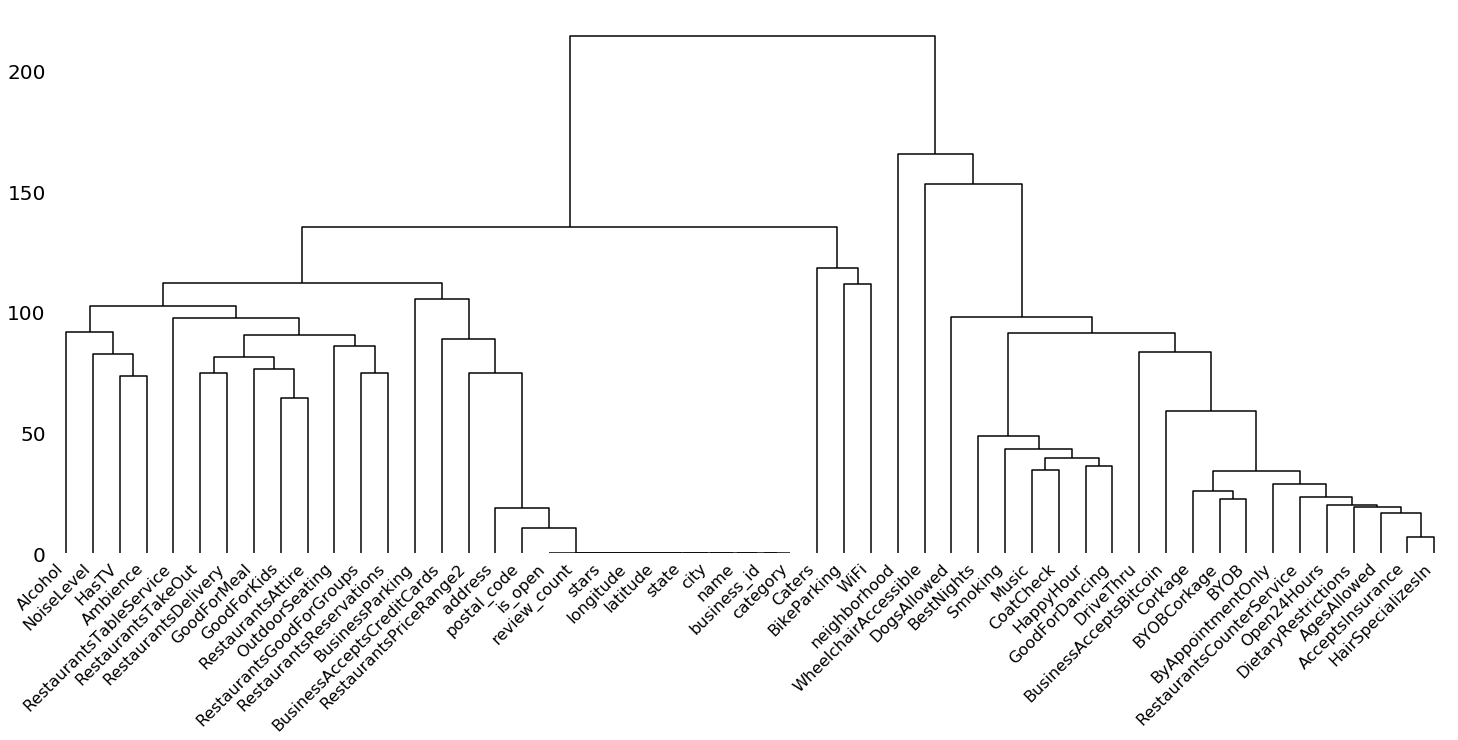

In [109]:
mno.dendrogram(df_business, orientation='top')

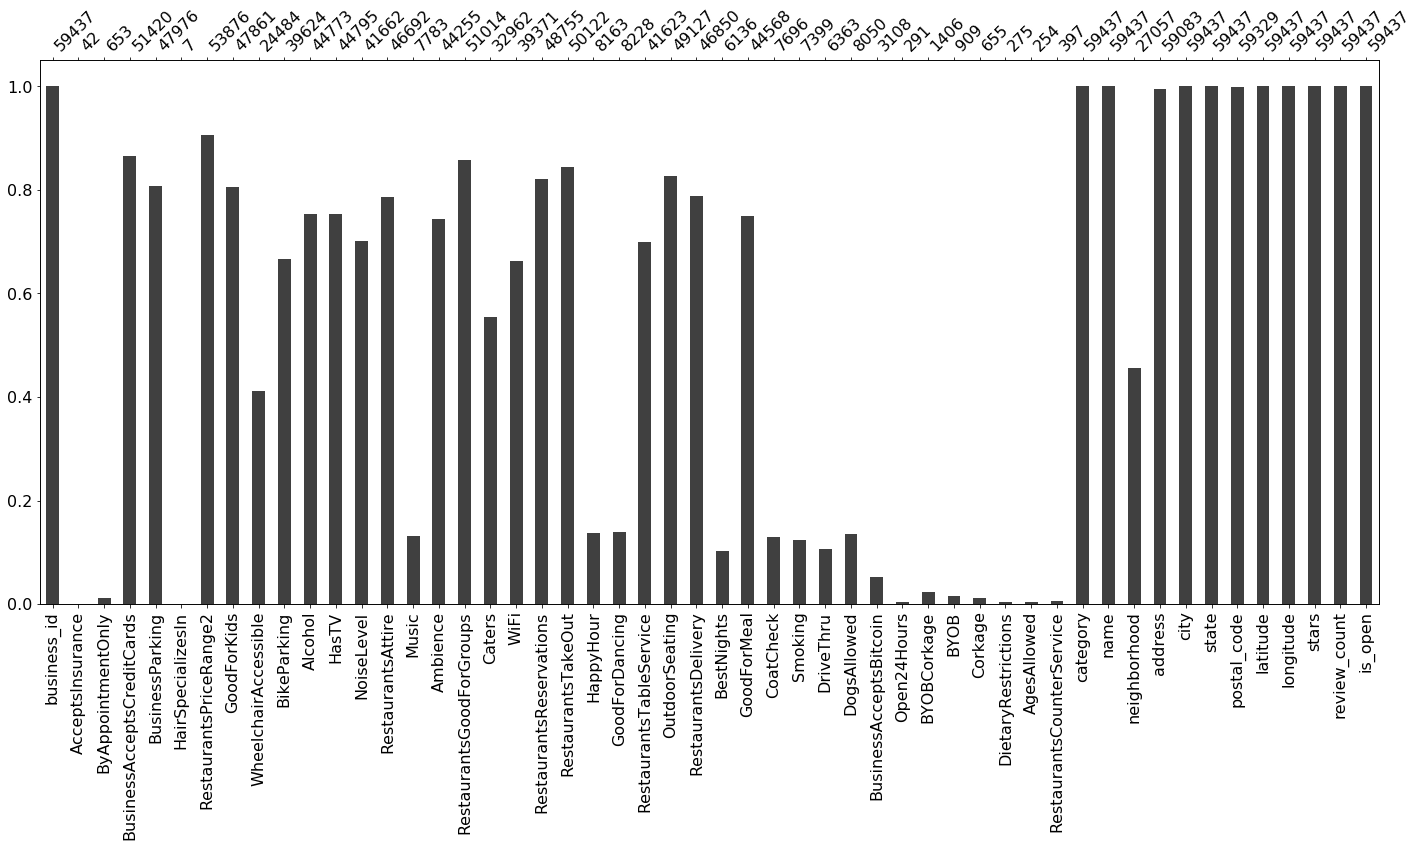

In [110]:
mno.bar(df_business)

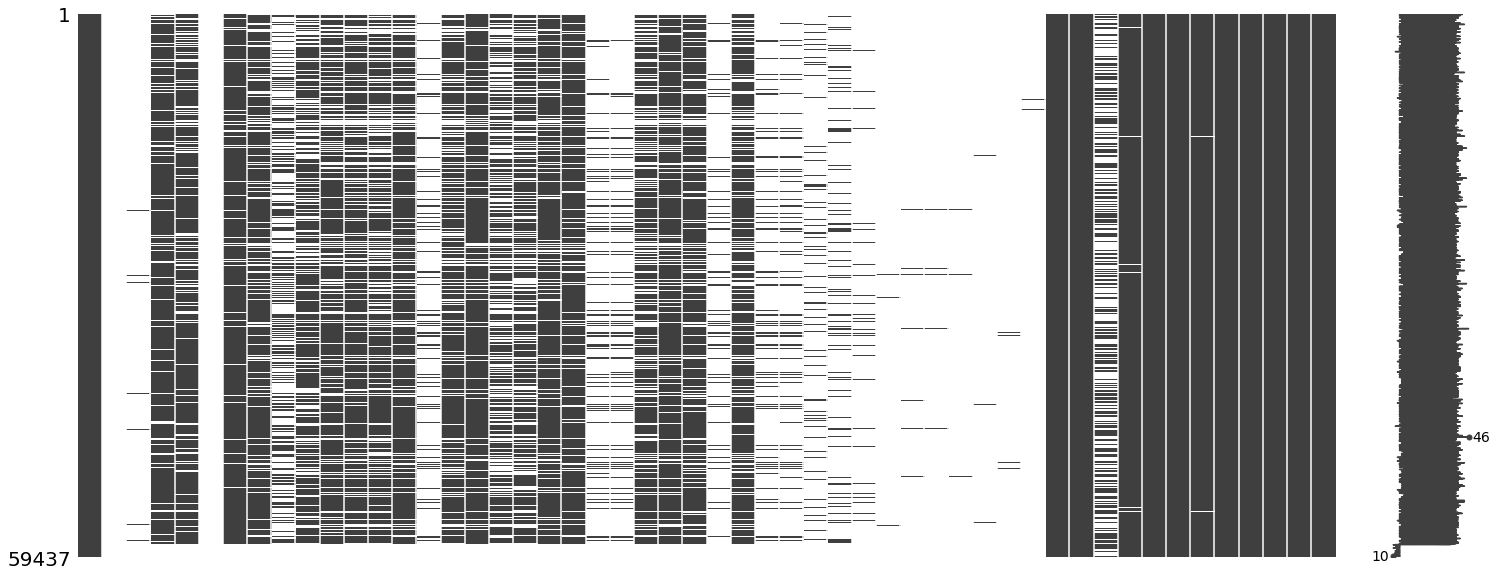

In [111]:
mno.matrix(df_business)

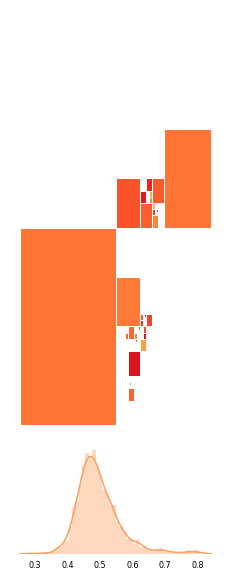

In [113]:
mno.geoplot(df_business, x='latitude',y='longitude', histogram=True)

In [50]:
y = Series(df_temp.elite.values, index = df_temp.elite)
y

elite
34928    34928
30856    30856
26018    26018
20488    20488
19841    19841
17777    17777
13185    13185
10485    10485
6536      6536
3621      3621
2363      2363
887        887
140        140
dtype: int64

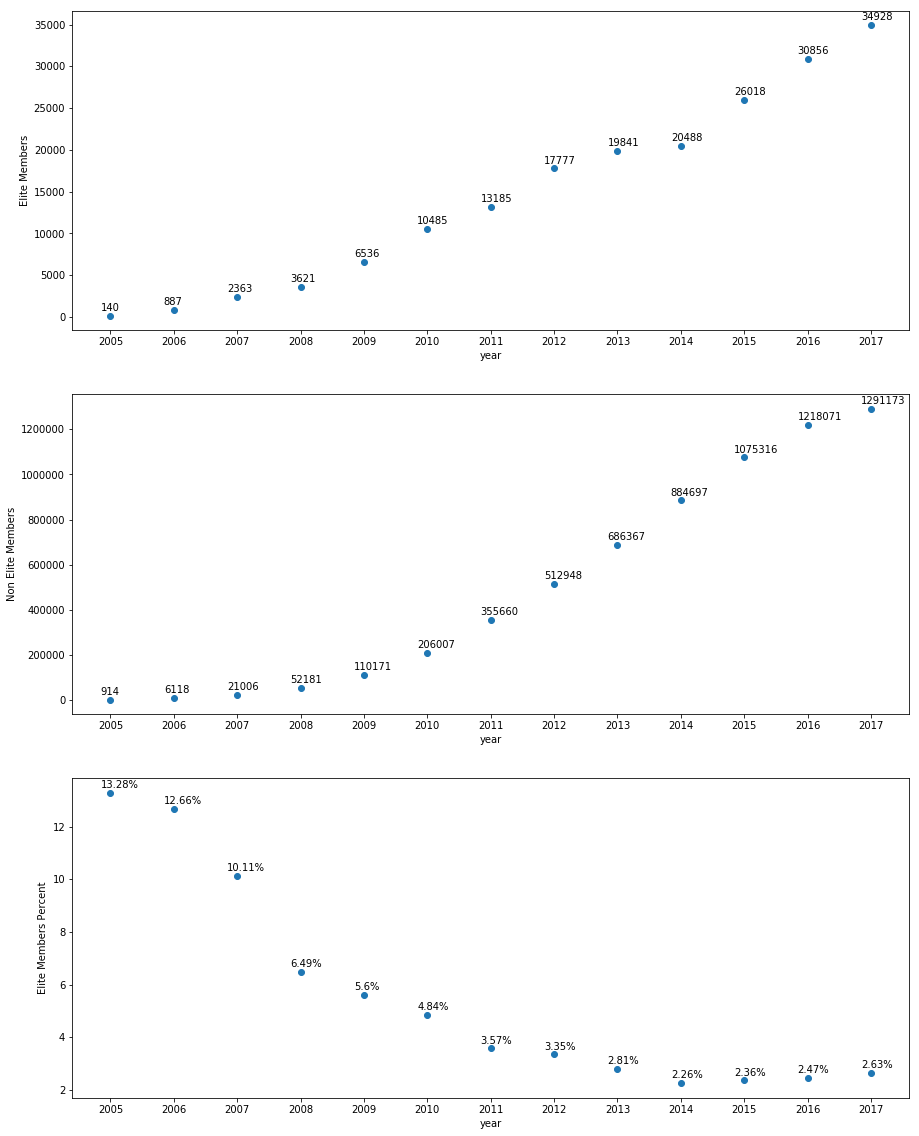

In [59]:
fig,axis = plt.subplots(3)
fig.set_size_inches(15,20)
axis[0].scatter(x = df_temp.year, y=df_temp.elite, marker="o" )
for i,j in zip(df_temp.year,df_temp.elite):
    axis[0].annotate(str(j),xy=(i,j), xytext=(-10,5), textcoords='offset points')
axis[0].set_ylabel("Elite Members")
axis[0].set_xlabel("year")
axis[1].scatter(x = df_temp.year, y=df_temp.non_elite, marker="o")
for i,j in zip(df_temp.year,df_temp.non_elite):
    axis[1].annotate(str(j),xy=(i,j), xytext=(-10,5), textcoords='offset points')
axis[1].set_ylabel("Non Elite Members")
axis[1].set_xlabel("year")
axis[2].scatter(x = df_temp.year, y=df_temp.elite_percent, marker="o")
for i,j in zip(df_temp.year,df_temp.elite_percent.round(decimals = 2)):
    axis[2].annotate(str(j) + '%',xy=(i,j), xytext=(-10,5), textcoords='offset points')
axis[2].set_ylabel("Elite Members Percent")
axis[2].set_xlabel("year")
plt.show()

In [60]:
review_by_elite = df_review.groupby(['reviewByElite','review_year']).count().reset_index()

In [ ]:
# review_by_elite.rename(columns={'business_id': 'review_count'}, inplace=True)
# plt.figure(figsize=(10,10))
# plt.plot(review_by_elite['review_year'][review_by_elite.reviewByElite==0], 
#          review_by_elite['review_count'][review_by_elite.reviewByElite==0], 'bo-', label='Non Elite')
# plt.plot(review_by_elite['review_year'][review_by_elite.reviewByElite==1], 
#          review_by_elite['review_count'][review_by_elite.reviewByElite==1], 'go-', label='Elite', )
# ax = plt.plot(review_by_elite['review_year'][review_by_elite.reviewByElite==2], 
#          review_by_elite['review_count'][review_by_elite.reviewByElite==2], 'ro-', label='Error')
# plt.title('Per year Review Count by elite/non-elite members')
# plt.legend()
# plt.show()

Text(0.5,1,'Review count by year and user types')

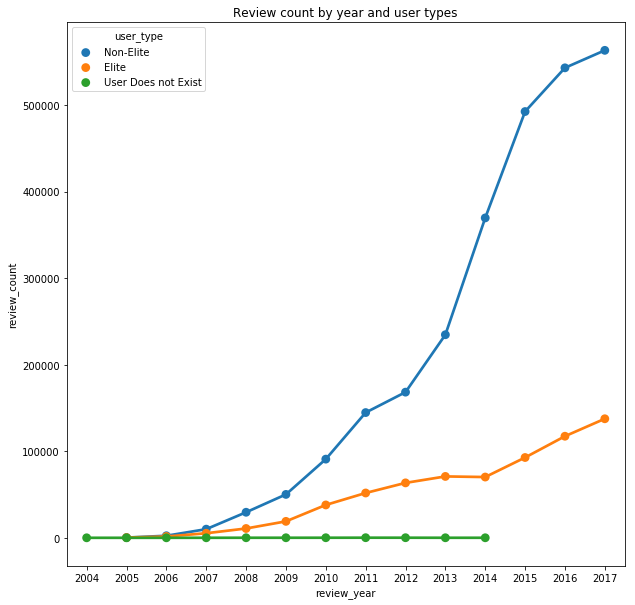

In [61]:
review_by_elite.rename(columns={'business_id': 'review_count'}, inplace=True)
review_by_elite['user_type'] = review_by_elite['reviewByElite'].apply(lambda x: 
        'Non-Elite' if (x==0) else ('Elite' if(x==1) else 'User Does not Exist'))

fig, ax = plt.subplots(figsize=(10,10))
ax = seaborn.pointplot(x=review_by_elite.review_year, y=review_by_elite.review_count, 
                  hue=review_by_elite['user_type'], ax=ax)
plt.title("Review count by year and user types")
plt.show()

In [199]:
df_review.head()

business_id                 user_id  stars                 date  \
0  Ue6-WhXvI-_1xUIuapl0zQ  gVmUR8rqUFdbSeZbsg6z_w      4  2014-02-17 00:00:00   
1  Ae4ABFarGMaI5lk1i98A0w  Y6qylbHq8QJmaCRSlKdIog      4  2016-07-24 00:00:00   
2  lKq4Qsz13FDcAVgp49uukQ  SnXZkRN9Yf060pNTk1HMDg      5  2012-04-07 00:00:00   
3  6nKR80xEGHYf2UxAe_Cu_g  VcmSgvslHAhqWoEn16wjjw      5  2015-09-11 00:00:00   
4  Z_mJYg3vi8cPZHa1J4BALw  NKF9v-r0jd1p0JVi9h2T1w      5  2016-01-22 00:00:00   

  review_year  reviewByElite  
0        2014              1  
1        2016              0  
2        2012              1  
3        2015              0  
4        2016              0

## Break into train, CV, test
Train, cv, test ratio - 50%, 20%, 30%

In [62]:
train_CV, test = train_test_split(df_review[['user_id', 'business_id', 'stars']][df_review.reviewByElite==1], test_size=0.3, random_state=92678)

In [63]:
train, cv = train_test_split(train_CV, test_size=0.10, random_state=92678)

In [64]:
wholeData=len(df_review["stars"][df_review.reviewByElite==1])
trainData=len(train["stars"])
cvData=len(cv["stars"])
testData=len(test["stars"])
print("% of train data", trainData/(wholeData/100))
print("% of cv data", cvData/(wholeData/100))
print("% of test data", testData/(wholeData/100))

% of train data 62.99986591164609
% of cv data 7.000001473498395
% of test data 30.000132614855517


In [65]:
print(train.count())
print(test.count())
print(cv.count())
print(train_CV.count())


user_id        427553
business_id    427553
stars          427553
dtype: int64
user_id        203598
business_id    203598
stars          203598
dtype: int64
user_id        47506
business_id    47506
stars          47506
dtype: int64
user_id        475059
business_id    475059
stars          475059
dtype: int64


## Export this data 

In [66]:
pd.to_pickle(train, "train")
pd.to_pickle(test, "test")
pd.to_pickle(cv, "cv")
pd.to_pickle(train_CV, "train_cv")

### Restart the kernel and run the process from here

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
import seaborn
from pandas import Series
import matplotlib.font_manager as font_manager

In [2]:
# train = pd.read_pickle("train")
# test = pd.read_pickle("test")
cv = pd.read_pickle("cv")
# train_CV = pd.read_pickle("train_cv")
# train.reset_index(drop=True, inplace=True)
# test.reset_index(drop=True, inplace=True)
cv.reset_index(drop=True, inplace=True)
# train_CV.reset_index(drop=True, inplace=True)
# train_CV.info()
cv.info()
# train.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47506 entries, 0 to 47505
Data columns (total 3 columns):
user_id        47506 non-null object
business_id    47506 non-null object
stars          47506 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


## Model Creation 

In [4]:
# Import libraries

# Import all the prediction algorithms
from surprise import SVD
from surprise import KNNBaseline
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import NormalPredictor
from surprise import BaselineOnly
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering

from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import Reader

In [6]:
# Create reader object with the rating_scale param defined as from range 0 to 5.
reader = Reader(rating_scale=(0, 5))

# Convert Pandas train, test and cv dataframes into surprise dataset
# train = Dataset.load_from_df(train, reader)
# test = Dataset.load_from_df(test, reader)
cv = Dataset.load_from_df(cv, reader)

NormalPredictor : Algorithm predicting a random rating based on the distribution of the training set, which is assumed to be normal.

BaselineOnly : Algorithm predicting the baseline estimate for given user and item.

KNN Based Algorithms
1. KNNBasic - A basic collaborative filtering algorithm.
* KNNWithMeans - A basic collaborative filtering algorithm, taking into account the mean ratings of each user.
* KNNWithZScore - A basic collaborative filtering algorithm, taking into account the z-score normalization of each user.
* KNNBaseline - A basic collaborative filtering algorithm taking into account a baseline rating.

Matrix Factorization-based algorithms
1. SVD
2. SVDpp - The SVD++ algorithm, an extension of SVD taking into account implicit ratings.
3. NMF - A collaborative filtering algorithm based on Non-negative Matrix Factorization.


Slopeone

CoClustering

In [7]:
# param_grid = {'bsl_options': {'method': ['als', 'sgd']
#                               ,'reg': [1, 2]
#                               , 'n_epochs' : 1
#                              }
#               ,'k': [50]
#               ,'sim_options': {'name': ['pearson_baseline']
#                              , 'min_support': [1, 5]
#                               ,'user_based': [True]
#                              }              
#               }
# bsl_options = {'method': 'als',
#                'n_epochs': 1,
#                'reg_u': 12,
#                'reg_i': 5
#                }
# Create instance of prediction algorithms
algo = [SVD(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), NormalPredictor(), BaselineOnly(), 
        SVDpp(), NMF(), SlopeOne(), CoClustering()]

In [8]:
# Run 5-fold cross-validation and print results
svd_output = cross_validate(algo[0], cv, measures=['RMSE', 'MAE',], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0051  1.0011  1.0261  0.9999  0.9894  1.0043  0.0120  
MAE (testset)     0.7977  0.7951  0.8101  0.7886  0.7833  0.7950  0.0091  
Fit time          4.64    4.13    3.69    3.77    2.18    3.68    0.82    
Test time         0.12    0.20    0.13    0.10    0.07    0.13    0.04    


In [9]:
KNNBaseline_output = cross_validate(algo[1], cv, measures=['RMSE', 'MAE',], cv=5, verbose=True)

Estimating biases using als...
Computing the msd similarity matrix...
Estimating biases using als...
Computing the msd similarity matrix...
Estimating biases using als...
Computing the msd similarity matrix...
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBaseline on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0022  1.0142  1.0125  1.0242  1.0187  1.0144  0.0073  
MAE (testset)     0.7937  0.8044  0.8043  0.8033  0.8050  0.8021  0.0042  
Fit time          16.49   18.04   18.45   18.48   6.32    15.56   4.67    
Test time         0.18    0.19    0.13    0.13    0.11    0.15    0.03    


In [10]:
KNNBasic_output = cross_validate(algo[2], cv, measures=['RMSE', 'MAE',], cv=5, verbose=True)

Computing the msd similarity matrix...
Computing the msd similarity matrix...
Computing the msd similarity matrix...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0393  1.0388  1.0471  1.0543  1.0556  1.0470  0.0071  
MAE (testset)     0.8319  0.8285  0.8403  0.8439  0.8455  0.8380  0.0067  
Fit time          16.85   18.51   17.55   18.33   5.96    15.44   4.78    
Test time         0.18    0.13    0.19    0.12    0.11    0.15    0.04    


In [11]:
KNNWithMeans_output = cross_validate(algo[3], cv, measures=['RMSE', 'MAE',], cv=5, verbose=True)

Computing the msd similarity matrix...
Computing the msd similarity matrix...
Computing the msd similarity matrix...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.1274  1.1059  1.1156  1.1270  1.1261  1.1204  0.0085  
MAE (testset)     0.8775  0.8586  0.8723  0.8760  0.8771  0.8723  0.0071  
Fit time          18.11   17.01   18.47   18.56   6.09    15.65   4.81    
Test time         0.19    0.19    0.12    0.12    0.11    0.14    0.04    


In [12]:
KNNWithZScore_output = cross_validate(algo[4], cv, measures=['RMSE', 'MAE',], cv=5, verbose=True)

Computing the msd similarity matrix...
Computing the msd similarity matrix...
Computing the msd similarity matrix...
Computing the msd similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithZScore on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.1325  1.1312  1.1158  1.1178  1.1119  1.1218  0.0084  
MAE (testset)     0.8789  0.8882  0.8644  0.8685  0.8655  0.8731  0.0091  
Fit time          18.52   18.20   19.33   19.13   5.79    16.20   5.22    
Test time         0.23    0.23    0.20    0.17    0.12    0.19    0.04    


In [13]:
NormalPredictor_output = cross_validate(algo[5], cv, measures=['RMSE', 'MAE',], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm NormalPredictor on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.4076  1.3850  1.3981  1.3873  1.4166  1.3989  0.0120  
MAE (testset)     1.1218  1.1035  1.1162  1.1038  1.1228  1.1136  0.0084  
Fit time          0.05    0.05    0.04    0.06    0.05    0.05    0.01    
Test time         0.08    0.08    0.07    0.09    0.07    0.08    0.01    


In [14]:
BaselineOnly_output = cross_validate(algo[6], cv, measures=['RMSE', 'MAE',], cv=5, verbose=True)

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Evaluating RMSE, MAE of algorithm BaselineOnly on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0034  0.9993  1.0114  1.0001  1.0024  1.0033  0.0043  
MAE (testset)     0.7954  0.7932  0.7983  0.7953  0.7949  0.7954  0.0016  
Fit time          0.18    0.14    0.15    0.12    0.10    0.14    0.03    
Test time         0.10    0.11    0.10    0.07    0.05    0.09    0.02    


In [15]:
SVDpp_output = cross_validate(algo[7], cv, measures=['RMSE', 'MAE',], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0087  1.0022  1.0078  1.0035  1.0031  1.0051  0.0026  
MAE (testset)     0.7910  0.7945  0.7967  0.7961  0.7924  0.7941  0.0022  
Fit time          12.47   12.44   12.61   12.62   10.28   12.09   0.90    
Test time         0.27    0.27    0.27    0.16    0.14    0.22    0.06    


In [16]:
NMF_output = cross_validate(algo[8], cv, measures=['RMSE', 'MAE',], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.2920  1.2944  1.2886  1.2848  1.2790  1.2878  0.0054  
MAE (testset)     1.0362  1.0417  1.0401  1.0280  1.0246  1.0341  0.0067  
Fit time          8.80    8.88    8.80    8.54    4.56    7.92    1.68    
Test time         0.12    0.12    0.11    0.07    0.06    0.10    0.03    


In [17]:
SlopeOne_output = cross_validate(algo[9], cv, measures=['RMSE', 'MAE',], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SlopeOne on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.1362  1.1295  1.1250  1.1288  1.1291  1.1297  0.0036  
MAE (testset)     0.8857  0.8783  0.8802  0.8743  0.8746  0.8786  0.0042  
Fit time          48.31   42.45   42.71   58.69   7.12    39.86   17.39   
Test time         0.25    0.46    0.09    4.66    0.08    1.11    1.78    


In [18]:
CoClustering_output = cross_validate(algo[10], cv, measures=['RMSE', 'MAE',], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm CoClustering on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.1563  1.1621  1.1556  1.1546  1.1597  1.1577  0.0028  
MAE (testset)     0.9030  0.9096  0.9000  0.8949  0.9066  0.9028  0.0051  
Fit time          6.08    5.79    5.50    5.54    2.88    5.16    1.16    
Test time         0.05    0.11    0.10    0.11    0.06    0.09    0.02    


In [52]:
def collectOutput(name, df):
    df_output = pd.DataFrame(df)
    df_output['Algorithm']=name
    df_output['Iteration']= ['CV run 1', 'CV run 2', 'CV run 3', 'CV run 4', 'CV run 5']
    return df_output

In [53]:
def mergeDF(df1, df2):
    return df1.merge(df2, how='outer')

In [54]:
df_output = collectOutput('CoClustering',CoClustering_output)
df_output = mergeDF(df_output, collectOutput('SlopeOne',SlopeOne_output))
df_output = mergeDF(df_output, collectOutput('NMF',NMF_output))
df_output = mergeDF(df_output, collectOutput('SVDpp',SVDpp_output))
df_output = mergeDF(df_output, collectOutput('BaselineOnly',BaselineOnly_output))
df_output = mergeDF(df_output, collectOutput('NormalPredictor',NormalPredictor_output))
df_output = mergeDF(df_output, collectOutput('KNNWithZScore',KNNWithZScore_output))
df_output = mergeDF(df_output, collectOutput('KNNWithMeans',KNNWithMeans_output))
df_output = mergeDF(df_output, collectOutput('KNNBasic',KNNBasic_output))
df_output = mergeDF(df_output, collectOutput('KNNBaseline',KNNBaseline_output))
df_output = mergeDF(df_output, collectOutput('SVD',svd_output))

In [76]:
pd.to_pickle(df_output,"df_output")

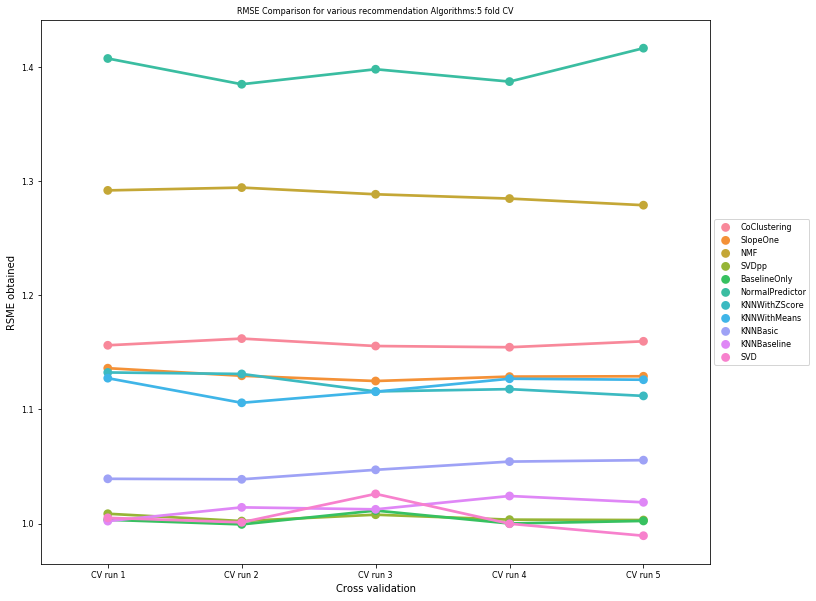

In [75]:
fig, ax = plt.subplots(figsize=(15,10))
seaborn.pointplot(data=df_output, x = 'Iteration', y = 'test_rmse', hue='Algorithm', ax=ax)

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title("RMSE Comparison for various recommendation Algorithms:5 fold CV")
plt.xlabel("Cross validation")
plt.ylabel("RSME obtained")
plt.savefig("RMSE Comparison")
plt.show()

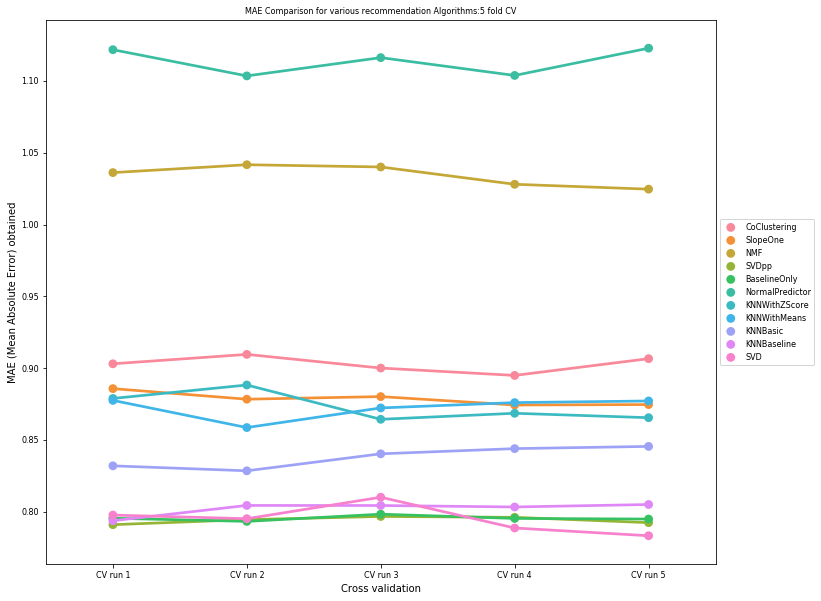

In [74]:
fig, ax = plt.subplots(figsize=(15,10))
seaborn.pointplot(data=df_output, x = 'Iteration', y = 'test_mae', hue='Algorithm', ax=ax)

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title("MAE Comparison for various recommendation Algorithms:5 fold CV")
plt.xlabel("Cross validation")
plt.ylabel("MAE (Mean Absolute Error) obtained")
plt.savefig("MAE Comparison")
plt.show()


### Below section is to load the data file with review text populated - takes ard 6GB of RAM 

In [2]:
df_resturant_review_text = pd.read_csv("resturant_review.csv", sep='\\t', engine="python", header=None)

In [3]:
df_resturant_review_text.columns = {"id", "business_id","user_id", "stars", "date", "text", "useful", "funny", "cool"}

In [4]:
df_resturant_review_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3222632 entries, 0 to 3222631
Data columns (total 9 columns):
date           object
useful         object
user_id        object
funny          float64
business_id    object
stars          object
id             float64
text           float64
cool           float64
dtypes: float64(4), object(5)
memory usage: 221.3+ MB
